In [2]:
import os
os.chdir('..')


In [3]:

import sys
import xarray
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
from constants import columns_names
from key_handlers import key_functions
from image_handling.imagej_manager import ImageJManager
from file_handling import generic_handlers 
from image_handling import image_functions
print(os.getcwd())

ij = ImageJManager('default').get_ij()

from data_storage_classes.data_classes import DirectoryStorageInformation, ImageInfoStorage, DataFrameInfo
from image_handling import fiji_commands, segmentation_functions
from Tracker import Tracker
from image_handling.mask_segmenters.segmentation_class import SegmentationClass
from image_handling.mask_segmenters import segmentation_algorithms
from typing import Dict, List, Callable, Optional, Union, Any
import pandas as pd
from dataclasses import dataclass, field
from datetime import datetime

Failed to guess the Java version.


D:\OneDrive\Virus\SpudMaster
Registered segmentation method: cellpose
Registered segmentation method: unknown
Registered segmentation method: other


In [6]:
image = fiji_commands.read_images_to_python(ij, r'D:\olympus_images\test\test_save\date-20250124_experiment-102049_techReplicate-1_well-A1_construct-1_experiment-test_replicate-1_passage-26.tif')

float64


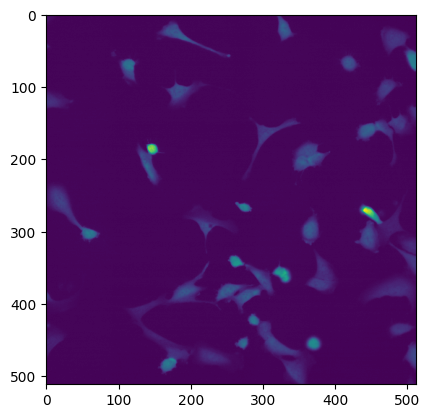

In [8]:
img = image.isel(ch=0).values
print(img.dtype)
import matplotlib.pyplot as plt
plt.imshow(img)

In [10]:
image_functions.is_image_empty(img, background_threshold=2.0)

False

In [9]:

from cellpose import models 
model = models.Cellpose(gpu=True, model_type="cyto3")
start_time = datetime.now()
masks, flows, styles, diams =model.eval(img, diameter=60, channels=[0,0])
end_time = datetime.now()

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time.total_seconds()}")


Elapsed time: 0.497033


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


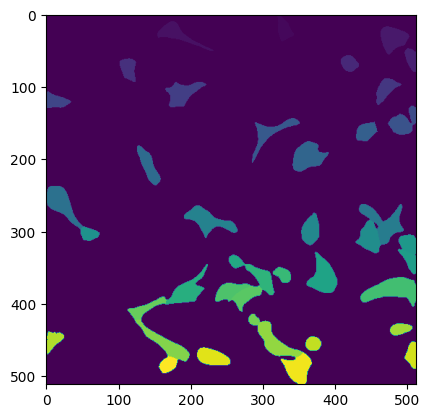

In [15]:
print(masks)
plt.imshow(masks)

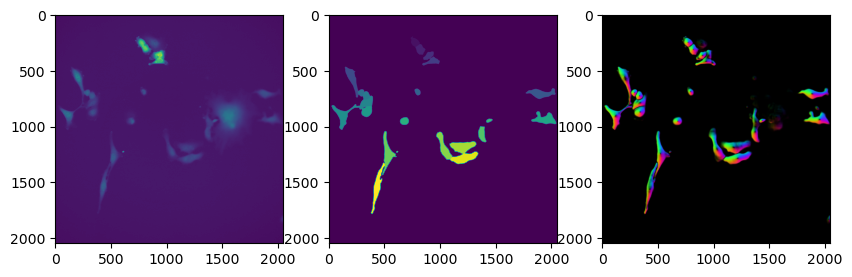

In [9]:
fig, ax = plt.subplots(1,3, figsize=(10,10))

ax[0].imshow(img)
ax[1].imshow(masks)
ax[2].imshow(flows[0])


In [10]:
mask = masks.astype(np.uint8)
print(img.dtype)
props = ski.measure.regionprops_table(mask, intensity_image = img, properties=['label', 'area', 'intensity_mean', 'intensity_min', 'intensity_max', 'intensity_std'])

float64


In [20]:
print(props)

{'label': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43]), 'area': array([ 500.,  846.,  998.,  368.,  419.,  538.,  635., 1053.,  511.,
        203.,  682.,  925.,  564., 1317.,  790., 1273.,  469.,  986.,
       1318.,  798.,  954.,  364.,  514.,  409., 1346.,  275., 1170.,
        773.,  365., 1780.,  721.,  704.,  599.,  195., 1153., 1240.,
        387.,  452.,  353.,  412.,  838., 1110.,  424.]), 'intensity_mean': array([5080.184     , 4617.57801418, 3337.07214429, 6640.14673913,
       4537.95465394, 5525.99256506, 3495.28503937, 3748.70180437,
       3245.        , 3125.21182266, 3394.26539589, 3644.64      ,
       5083.19503546, 4722.66135156, 4636.12405063, 3737.35585232,
       9096.30063966, 2668.38945233, 2982.91729894, 4446.69298246,
       4013.18658281, 6225.44505495, 2902.04280156, 3616.17114914,
       3443.21322437, 7747.65

In [ ]:
#addition features

#set up functions to be used in below segmentation features
#thresholding_functions
#register segmentation algorithms, out put from the algorithm has to be an uint8 image to be a mask


    

In [3]:


def create_empty_mask(row:int, col:int):
    return np.zeros((row, col), dtype=np.uint8)


def save_mask(mask: Dict[int, np.array], save_dir, image_name): 
    '''
    saves a mask to a directory to allow for future reruns to either save processing time or compare
    '''

def _save_df_to_csv(directory: str, csv_name: str):
    '''saves images'''



def get_image_dimensions(image, dim):
    '''
    Return the size of the image and its specified dimension
    '''
    return None

def get_sizes_of_image(image):
    '''
    return the sizes of the image
    '''
    return None
    


 


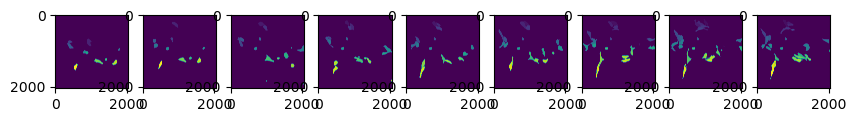

In [25]:
fig, ax = plt.subplots(1, len(tmp_dict), figsize= (10,10))

for key, value in tmp_dict.items():
    ax[key].imshow(value)

In [25]:
#Take mask and and extract image data

properties = ['label', 'area', 'intensity_mean', 'intensity_min', 'intensity_max', 'intensity_std']


test_dict = get_image_data(tmp_dict, image_dict, properties)

NameError: name 'get_image_data' is not defined

In [18]:
class ImageProcessor:
    def __init__(self, 
                 ij: Callable, 
                 image_dir: Union[List[str], str], 
                 save_dir: Union[List[str], str]= None, 
                 properties: Union[None, str, List[str]] = None, 
                 channel: int = 0, 
                 donor_construct: str = 'mTQ2', 
                 acceptor_construct: str = 'mNG',
                 segmentation_algorithm: str = "cellpose",
                 file_type: str = 'tif', 
                 tracker_file: Any = None,
                 **kwargs):
        """
        Initialize the ImageProcessor with the given parameters.
        """
        self.ij = ij
        self.segmentation_class = SegmentationClass()
        self.directory_storage = DirectoryStorageInformation()
        self.image_data_storage = ImageInfoStorage()
        self.dataframe_storage = DataFrameInfo()
        self.file_type = file_type
        # Set directories and load image files.
        self.directory_storage.directories = image_dir
        if save_dir != None:
            self.directory_storage.save_dir = save_dir
            
        self.directory_storage.total_images = self.__concatenate_image_files()
        
        self.plot_masks = False
        self.save_mask = False
        
        if tracker_file is not None:
            self.tracker = Tracker(tracker_file)
        else:
            self.tracker = Tracker()
        self.tracker.load_files(self.directory_storage.total_images)
        
        # Set the segmentation algorithm with any extra keyword arguments.
        self.segmentation_class.set_algorithm(segmentation_algorithm, **kwargs)
        self.segmentation_channel = channel
        
        self.donor = donor_construct
        self.acceptor = acceptor_construct
        self.dataframe = pd.DataFrame()
        self.elapsed_time = None
        
        if properties is None:
            self.properties = ['label', 'area', 'intensity_mean', 'intensity_min', 'intensity_max', 'intensity_std']
        elif properties == 'all':
            self.properties = ['label']
        else:
            self.properties = properties
    
    def get_directory_list(self) -> Union[List[str], str]:
        return self.directory_storage.directories

    def get_total_file_length(self) -> int:
        return len(self.directory_storage.total_images)

    def get_total_file_list(self) -> List[str]:
        return self.directory_storage.total_images
    
    def processed_time(self) -> str:
        return f"Total time to process is {self.elapsed_time} seconds"
    
    def __retrieve_files__(self, directory: str, file_type: str) -> List[str]:
        """
        Retrieve all files with the given extension from a directory.
        """
        try:
            file_list = generic_handlers.get_files_by_extension(directory, file_type)
            return file_list
        except Exception as e:
            raise RuntimeError(f"Error retrieving files from {directory}") from e
    
    def __concatenate_image_files(self) -> List[str]:
        """
        Concatenate image files from the provided directories.
        """
        
        if isinstance(self.directory_storage.directories, str):
            self.directory_storage.directories= [self.directory_storage.directories]
            

        image_file_list = []
        for index, directory in enumerate(self.directory_storage.directories):
            tmp_list = []
            tmp_list.extend(self.__retrieve_files__(directory, self.file_type))
            if self.directory_storage.save_dir != None:
                current_save = self.directory_storage.save_dir[index]
                self.directory_storage.save_dir_dict.update({file: current_save for file in tmp_list})
            image_file_list.extend(tmp_list)
        return image_file_list
    
    def __create_mask(self, image: np.ndarray) -> Union[np.ndarray, None]:
        """
        Run the segmentation algorithm on the image.
        Checks first if the image is empty.
        """
        try:
            if image_functions.is_image_empty(image, pixels_to_count=10000, background_threshold=4):
                return None
            
            else:
                mask = self.segmentation_class.generate_mask(image)
                return mask.astype(np.uint8) if mask is not None else None 
        except Exception as e:
            raise ValueError(f'{e}')
            
    def __create_masks(self, image_dic: Dict[int, np.ndarray]) -> Dict[int, np.ndarray]:
        """
        Return a dictionary of masks from a series of timepoints.
        """
        
        mask_dic = {index: self.__create_mask(seg_image) for index, seg_image in image_dic.items()}
        return mask_dic
        
    def __filter_masks(self, mask_dict: Dict[int, Union[np.ndarray, None]]) -> Dict[int, np.ndarray]:
        """
        Filter out any None masks from the mask dictionary.
        """
        filtered_dict = {k: v for k, v in mask_dict.items() if v is not None}
        return filtered_dict
    
    def plot_image(self):
        """
        Stub method for plotting an image.
        """
        pass
    
    def get_image(self, image) -> str:
        """
        Open the image at the specified index and plot it.
        """
        return None
        
    def __open_image(self, image_file) -> Any:  # Replace Any with the appropriate type, e.g. xarray.DataArray
        """
        Open image using fiji_commands.
        """
        try:
            opened_image = fiji_commands.read_images_to_python(self.ij, image_file)
        except Exception as e:
            raise RuntimeError(f"Error opening image {image_file}") from e
        return opened_image
         
    def plot_mask(self):
        """
        Plot the current image mask.
        """
        pass

    def __set_DataFrame_save_info(self):
        """
        Set up data saving configuration for CSV output.
        """
        pass
    
    def __setup_segmentation_class(self):
        """
        Set up the segmentation class.
        """
        pass

    def __append_df(self):
        """
        Append dataframe information.
        """
        pass

    def save_masks(self, mask_dict):
        
        
        return None
        
    
    def get_DataFrame(self) -> pd.DataFrame:
        """
        Return the current DataFrame.
        """
        return self.dataframe

    def set_channel_names(self, channel):
        """
        Set channel names (to be implemented).
        """
        pass
    
    def __segment_image(self, image, process_all: bool = True) -> pd.DataFrame:
        """
        Process segmentation for a single image.
        Errors are caught and can be tracked.
        """
        if self.tracker.pipeline_failed():
            pass
        try:
            tmp_image = self.__open_image(image)
            self.image_data_storage.image_size_dict = {key: tmp_image[key] for key in tmp_image.sizes}
            self.image_data_storage.image_dict = segmentation_functions.flatten_time_series(tmp_image)      
            if self.image_data_storage.construct == self.acceptor:
                seg_ch_images = segmentation_functions.get_segmentation_channel(self.image_data_storage.image_dict, 1)
            else:
                seg_ch_images = segmentation_functions.get_segmentation_channel(self.image_data_storage.image_dict, self.segmentation_channel)
            output_mask = self.__create_masks(seg_ch_images)
            filtered_mask = self.__filter_masks(output_mask) if output_mask is not None else None

            if self.plot_masks:
                # Code to plot the mask (if implemented)
                pass
            
            if self.save_mask:
                # Code to save the mask (if implemented)
                pass
            image_properties = segmentation_functions.get_image_data(filtered_mask, self.image_data_storage.image_dict, self.properties)
            df = segmentation_functions.convert_dict_to_dataframe(image_properties)
            
           
        except Exception as e:
            self.tracker.display_progress()
            self.tracker.save_tracker()
            # Optionally log the error before creating an empty DataFrame
            df = pd.DataFrame()

        
        return df
    
    def image_segmentation(self) -> pd.DataFrame:
        """
        Perform segmentation on all images and return a consolidated DataFrame.
        """
        # Assume image_list is derived from total_images.
            
        self.image_data_storage.image_list = self.directory_storage.total_images
        self.tracker.display_progress()
        
        start_time = datetime.now()
        for image in self.directory_storage.total_images:
            try:
                self.image_data_storage.image_file = image
                self.image_data_storage.image_name = self.image_data_storage.get_image_name()
                self.image_data_storage.data_columns = self.image_data_storage.get_image_column_variables()
                self.image_data_storage.construct = self.image_data_storage.get_construct()
                # Optionally set construct from data_columns, e.g.:
                # self.image_data_storage.construct = self.image_data_storage.data_columns.get('construct', None)
                self.successfully_processed=False
                df = self.__segment_image(image)
                if not df.empty:
                    for key, value in self.image_data_storage.data_columns.items():
                        df[key] = value
                    self.dataframe = pd.concat([self.dataframe, df], ignore_index=True)
                    self.successfully_processed=True
                if self.successfully_processed:
                    self.tracker.remove_file_from_list(self.image_data_storage.image_file)
                elif not self.successfully_processed:
                    self.tracker.filed_failed(self.image_data_storage.image_file)
                self.tracker.display_progress()
                if len(self.tracker['failed_files'] == 0):
                    self.tracker.reset_tracker()
                else: 
                    self.tracker.get_failed_files()
            except Exception as e:
                self.tracker.remove_file_from_list(self.image_data_storage.image_file)
                self.tracker.display_progress()
                self.tracker.save_tracker()
        
        end_time = datetime.now()
        self.elapsed_time = (end_time - start_time).total_seconds()
        self.tracker.display_progress()
                
        return self.dataframe

In [19]:
processor = ImageProcessor(ij, r'D:\olympus_images\test\test_save')

2025-03-02 13:42:39,259 - INFO - Loaded tracker data from tracker_data.json
2025-03-02 13:42:39,260 - INFO - Loaded 16 files
2025-03-02 13:42:39,261 - INFO - Tracker data saved.


In [20]:
new_df = processor.image_segmentation()

2025-03-02 13:42:39,973 - INFO - Progress: 0/16 files processed. 16 remaining. files failed: 1.
2025-03-02 13:42:40,415 - INFO - Removed file from list: D:\olympus_images\test\test_save\date-20250124_experiment-102049_techReplicate-1_well-A1_construct-1_experiment-test_replicate-1_passage-26.tif
2025-03-02 13:42:40,416 - INFO - Tracker data saved.
2025-03-02 13:42:40,417 - INFO - Progress: 1/16 files processed. 15 remaining. files failed: 1.
2025-03-02 13:42:40,418 - INFO - Tracker data saved.


Running Cellpose segmentation...


2025-03-02 13:42:45,733 - INFO - Removed file from list: D:\olympus_images\test\test_save\date-20250124_experiment-102049_techReplicate-2_well-A1_construct-1_experiment-test_replicate-1_passage-26.tif
2025-03-02 13:42:45,735 - INFO - Tracker data saved.
2025-03-02 13:42:45,735 - INFO - Progress: 2/16 files processed. 14 remaining. files failed: 1.
2025-03-02 13:42:45,736 - ERROR - File not found in current list: D:\olympus_images\test\test_save\date-20250124_experiment-102049_techReplicate-2_well-A1_construct-1_experiment-test_replicate-1_passage-26.tif
2025-03-02 13:42:45,737 - INFO - Progress: 2/16 files processed. 14 remaining. files failed: 1.
2025-03-02 13:42:45,738 - INFO - Tracker data saved.
2025-03-02 13:42:46,169 - INFO - Removed file from list: D:\olympus_images\test\test_save\date-20250124_experiment-102050_techReplicate-1_well-A2_construct-1_experiment-test_replicate-2_passage-26.tif
2025-03-02 13:42:46,171 - INFO - Tracker data saved.
2025-03-02 13:42:46,171 - INFO - Prog

Running Cellpose segmentation...


2025-03-02 13:42:47,363 - INFO - Removed file from list: D:\olympus_images\test\test_save\date-20250124_experiment-102050_techReplicate-1_well-B1_construct-1_experiment-test_replicate-3_passage-26.tif
2025-03-02 13:42:47,364 - INFO - Tracker data saved.
2025-03-02 13:42:47,364 - INFO - Progress: 4/16 files processed. 12 remaining. files failed: 1.
2025-03-02 13:42:47,365 - ERROR - File not found in current list: D:\olympus_images\test\test_save\date-20250124_experiment-102050_techReplicate-1_well-B1_construct-1_experiment-test_replicate-3_passage-26.tif
2025-03-02 13:42:47,366 - INFO - Progress: 4/16 files processed. 12 remaining. files failed: 1.
2025-03-02 13:42:47,367 - INFO - Tracker data saved.
2025-03-02 13:42:47,782 - INFO - Removed file from list: D:\olympus_images\test\test_save\date-20250124_experiment-102050_techReplicate-2_well-A2_construct-1_experiment-test_replicate-2_passage-26.tif
2025-03-02 13:42:47,784 - INFO - Tracker data saved.
2025-03-02 13:42:47,784 - INFO - Prog

Running Cellpose segmentation...


2025-03-02 13:42:48,755 - INFO - Removed file from list: D:\olympus_images\test\test_save\date-20250124_experiment-102050_techReplicate-2_well-B1_construct-1_experiment-test_replicate-3_passage-26.tif
2025-03-02 13:42:48,756 - INFO - Tracker data saved.
2025-03-02 13:42:48,756 - INFO - Progress: 6/16 files processed. 10 remaining. files failed: 1.
2025-03-02 13:42:48,757 - ERROR - File not found in current list: D:\olympus_images\test\test_save\date-20250124_experiment-102050_techReplicate-2_well-B1_construct-1_experiment-test_replicate-3_passage-26.tif
2025-03-02 13:42:48,758 - INFO - Progress: 6/16 files processed. 10 remaining. files failed: 1.
2025-03-02 13:42:48,759 - INFO - Tracker data saved.


Running Cellpose segmentation...


2025-03-02 13:42:49,983 - INFO - Removed file from list: D:\olympus_images\test\test_save\date-20250124_experiment-102050_techReplicate-3_well-A1_construct-1_experiment-test_replicate-1_passage-26.tif
2025-03-02 13:42:49,984 - INFO - Tracker data saved.
2025-03-02 13:42:49,985 - INFO - Progress: 7/16 files processed. 9 remaining. files failed: 1.
2025-03-02 13:42:49,986 - ERROR - File not found in current list: D:\olympus_images\test\test_save\date-20250124_experiment-102050_techReplicate-3_well-A1_construct-1_experiment-test_replicate-1_passage-26.tif
2025-03-02 13:42:49,986 - INFO - Progress: 7/16 files processed. 9 remaining. files failed: 1.
2025-03-02 13:42:49,988 - INFO - Tracker data saved.
2025-03-02 13:42:50,501 - INFO - Removed file from list: D:\olympus_images\test\test_save\date-20250124_experiment-102050_techReplicate-3_well-A2_construct-1_experiment-test_replicate-2_passage-26.tif
2025-03-02 13:42:50,502 - INFO - Tracker data saved.
2025-03-02 13:42:50,503 - INFO - Progre

Running Cellpose segmentation...


2025-03-02 13:42:51,697 - INFO - Removed file from list: D:\olympus_images\test\test_save\date-20250124_experiment-102050_techReplicate-3_well-B1_construct-1_experiment-test_replicate-3_passage-26.tif
2025-03-02 13:42:51,699 - INFO - Tracker data saved.
2025-03-02 13:42:51,699 - INFO - Progress: 9/16 files processed. 7 remaining. files failed: 1.
2025-03-02 13:42:51,700 - ERROR - File not found in current list: D:\olympus_images\test\test_save\date-20250124_experiment-102050_techReplicate-3_well-B1_construct-1_experiment-test_replicate-3_passage-26.tif
2025-03-02 13:42:51,700 - INFO - Progress: 9/16 files processed. 7 remaining. files failed: 1.
2025-03-02 13:42:51,701 - INFO - Tracker data saved.


Running Cellpose segmentation...


2025-03-02 13:42:52,629 - INFO - Removed file from list: D:\olympus_images\test\test_save\date-20250124_experiment-102050_techReplicate-4_well-A1_construct-1_experiment-test_replicate-1_passage-26.tif
2025-03-02 13:42:52,630 - INFO - Tracker data saved.
2025-03-02 13:42:52,630 - INFO - Progress: 10/16 files processed. 6 remaining. files failed: 1.
2025-03-02 13:42:52,631 - ERROR - File not found in current list: D:\olympus_images\test\test_save\date-20250124_experiment-102050_techReplicate-4_well-A1_construct-1_experiment-test_replicate-1_passage-26.tif
2025-03-02 13:42:52,631 - INFO - Progress: 10/16 files processed. 6 remaining. files failed: 1.
2025-03-02 13:42:52,633 - INFO - Tracker data saved.


Running Cellpose segmentation...


2025-03-02 13:42:53,555 - INFO - Removed file from list: D:\olympus_images\test\test_save\date-20250124_experiment-102050_techReplicate-4_well-A2_construct-1_experiment-test_replicate-2_passage-26.tif
2025-03-02 13:42:53,556 - INFO - Tracker data saved.
2025-03-02 13:42:53,557 - INFO - Progress: 11/16 files processed. 5 remaining. files failed: 1.
2025-03-02 13:42:53,558 - ERROR - File not found in current list: D:\olympus_images\test\test_save\date-20250124_experiment-102050_techReplicate-4_well-A2_construct-1_experiment-test_replicate-2_passage-26.tif
2025-03-02 13:42:53,558 - INFO - Progress: 11/16 files processed. 5 remaining. files failed: 1.
2025-03-02 13:42:53,559 - INFO - Tracker data saved.
2025-03-02 13:42:53,962 - INFO - Removed file from list: D:\olympus_images\test\test_save\date-20250124_experiment-102050_techReplicate-4_well-B1_construct-1_experiment-test_replicate-3_passage-26.tif
2025-03-02 13:42:53,963 - INFO - Tracker data saved.
2025-03-02 13:42:53,963 - INFO - Prog

Running Cellpose segmentation...


2025-03-02 13:42:56,326 - INFO - Removed file from list: D:\olympus_images\test\test_save\date-20250124_experiment-102051_techReplicate-3_well-B2_construct-1_experiment-test_replicate-4_passage-26.tif
2025-03-02 13:42:56,327 - INFO - Tracker data saved.
2025-03-02 13:42:56,327 - INFO - Progress: 15/16 files processed. 1 remaining. files failed: 1.
2025-03-02 13:42:56,328 - ERROR - File not found in current list: D:\olympus_images\test\test_save\date-20250124_experiment-102051_techReplicate-3_well-B2_construct-1_experiment-test_replicate-4_passage-26.tif
2025-03-02 13:42:56,328 - INFO - Progress: 15/16 files processed. 1 remaining. files failed: 1.
2025-03-02 13:42:56,330 - INFO - Tracker data saved.
2025-03-02 13:42:56,879 - INFO - Removed file from list: D:\olympus_images\test\test_save\date-20250124_experiment-102051_techReplicate-4_well-B2_construct-1_experiment-test_replicate-4_passage-26.tif
2025-03-02 13:42:56,880 - INFO - Tracker data saved.
2025-03-02 13:42:56,880 - INFO - Prog

In [21]:
print(new_df)

     label    area  donor_intensity_mean  donor_intensity_min  \
0        1  1131.0           3784.602122               1850.0   
1        2   944.0           3240.056144               1837.0   
2        3  1526.0           3074.762123               1774.0   
3        4   658.0           2805.569909               1924.0   
4        5   405.0           7436.834568               1981.0   
..     ...     ...                   ...                  ...   
693     30   990.0           2716.419192               1825.0   
694     31  1806.0           3758.945183               2474.0   
695     32  1162.0           3107.880379               2007.0   
696     33   956.0           3878.548117               2553.0   
697     34   341.0           8703.838710               2254.0   

     donor_intensity_max  donor_intensity_std  acceptor_intensity_mean  \
0                 7099.0          1181.148346              5136.075155   
1                 4945.0           685.932409              4789.887712 

In [12]:
tmp_list = ['1', '2', '3']
for index, item in enumerate(tmp_list):
    print(index)
    print(item)

0
1
1
2
2
3
